In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import pickle


In [62]:
# Read from extracted data
df = pd.read_csv('../data/train_Jan1-7_scaled_2022-10-29_2127.csv')

In [63]:
columns_for_ID =[
'fl_date',
 'mkt_carrier',
 'mkt_carrier_fl_num','origin_airport_id', 'dest_airport_id']

df = df.set_index(columns_for_ID)

In [64]:
X = df.drop('arr_delay', axis = 1)   # features
y = df['arr_delay']    # labels

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape); 
print(X_test.shape)

(71806, 38)
(30775, 38)


In [66]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [67]:
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 15, alpha = 10, n_estimators = 200)

In [68]:
xgb_model.fit(X_train, y_train)
y_pred_train = xgb_model.predict(X_train)
print('RSME_train: ', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('R2_train: ', r2_score(y_train, y_pred_train))
print('MAE_train: ', mean_absolute_error(y_train, y_pred_train))


xgb_model.fit(X_test,y_test)
y_pred_test = xgb_model.predict(X_test)
print('RSME_test: ',np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('R2_test: ',r2_score(y_test, y_pred_test))
print('MAE_est: ',mean_absolute_error(y_test, y_pred_test))

RSME_train:  0.6990091945892856
R2_train:  0.5074913458739284
MAE_train:  0.47785569944954975
RSME_test:  0.6759998643751092
R2_test:  0.5512484894827168
MAE_est:  0.46608709104694135


In [ ]:


# params = {
#     'colsample_bytree': [0.7, 0.9,],
#     'gamma': [0.3, 0.4, 0.5], 
#     'max_depth': [2, 3, 4],
#     'subsample': [0.7,0.9]}



In [58]:
# Save the file to CSV
from datetime import datetime
datetime_now = datetime.now().strftime('%Y-%m-%d_%H%M')
filename = f'XGBoost_{datetime_now}.pickle'
print(filename)

XGBoost_2022-10-29_2305.pickle


In [59]:
# Save the model
pickle.dump(xgb_model,open(filename, 'wb'))

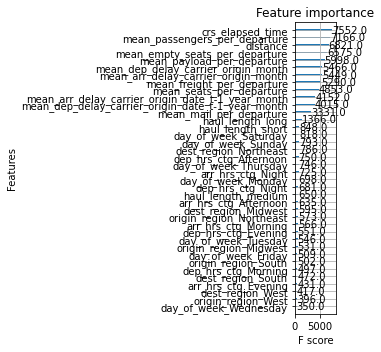

In [74]:
xgb.plot_importance(xgb_model)
plt.rcParams['figure.figsize'] = [5, 5]
# plt.show()
plt.tight_layout()